# 연령별취업자수관계
- 국가통계포털에서 <mark>행정구역(시도)/성/연령별 취업자</mark> 데이터 다운로드
- https://kosis.kr/search/search.do <hr>
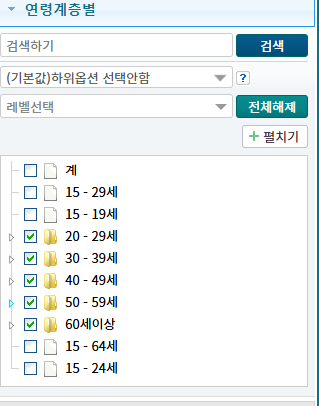

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

In [2]:
# 윈도우용 폰트 경로 설정
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
# plt.text(0.2,0.4,'한글',size=100)

In [3]:
file_path = "./ref/행정구역시도성연령별취업자20250304.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR")


In [4]:
ex_data = ori.copy() #깊은복사
ex_data.columns = ['region','year','age','gender','value'] #컬럼이름 일괄교체
ex_data.loc[ex_data['region']=='세종특별자치시','value'] = ex_data[ex_data['region']=='세종특별자치시']['value'].replace('-',0)

In [5]:
ex_data['value'] = ex_data['value'].astype(int)
ex1_data = ex_data.groupby('year')['value'].sum().reset_index(name="total")

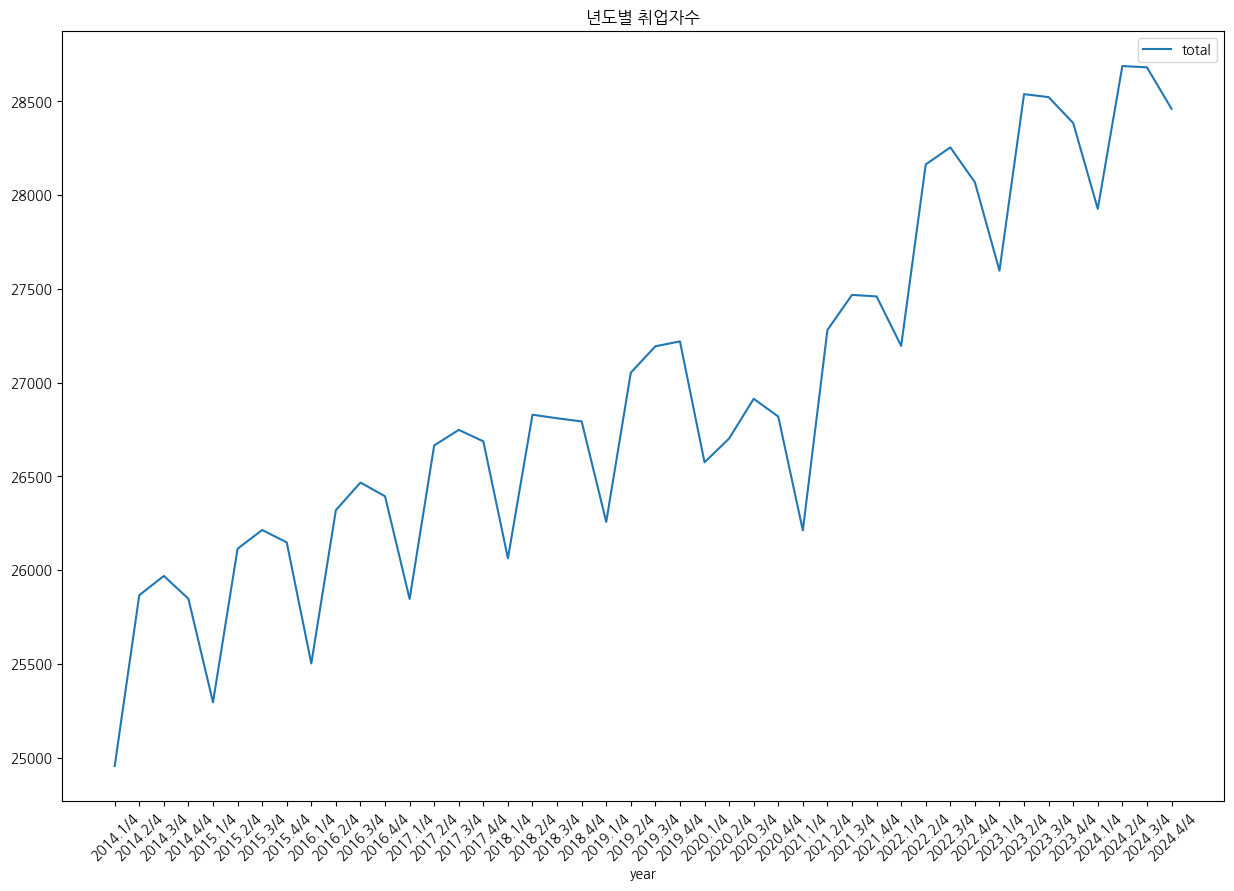

In [6]:
ax = ex1_data.plot(x='year',y='total',figsize=(15,10),title="년도별 취업자수")
ax.set_xticks(range(len(ex1_data)))
ax.set_xticklabels(ex1_data['year'], rotation = 45)
plt.show()

In [7]:
ex2_data = ori.copy() #깊은복사
ex2_data.columns = ['region','year','age','gender','value'] #컬럼이름 일괄교체
ex2_data.loc[ex2_data['region']=='세종특별자치시','value'] = ex2_data[ex2_data['region']=='세종특별자치시']['value'].replace('-',0)
# list(set(ex2_data['region']))

In [8]:
ex2_data['value'] = ex2_data['value'].astype(int)
gen = ex2_data.groupby(['year','gender'])['value'].sum().reset_index(name = 'total')

In [9]:
filter_m = gen['gender']=='남자'
filter_f = gen['gender']=='여자'
male = gen[filter_m]
female = gen[filter_f]

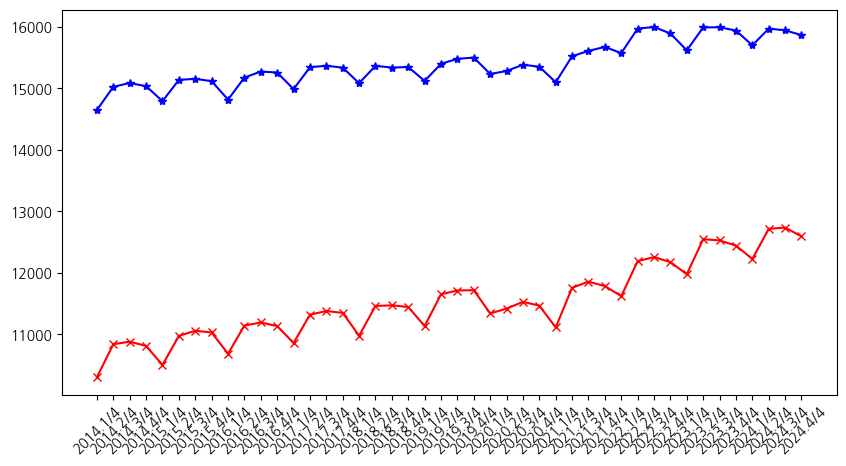

In [10]:
plt.figure(figsize=(10,5))
plt.plot(male['year'],male['total'],label='남자', color = 'blue',linestyle='-',marker='*')
plt.plot(female['year'],female['total'],label='여자', color = 'red',linestyle='-',marker='x')
plt.xticks(range(len(male)))
plt.xticks(rotation=45)
plt.show()

In [11]:
region_data = ex_data.groupby('region')['value'].sum().reset_index(name = 'total')


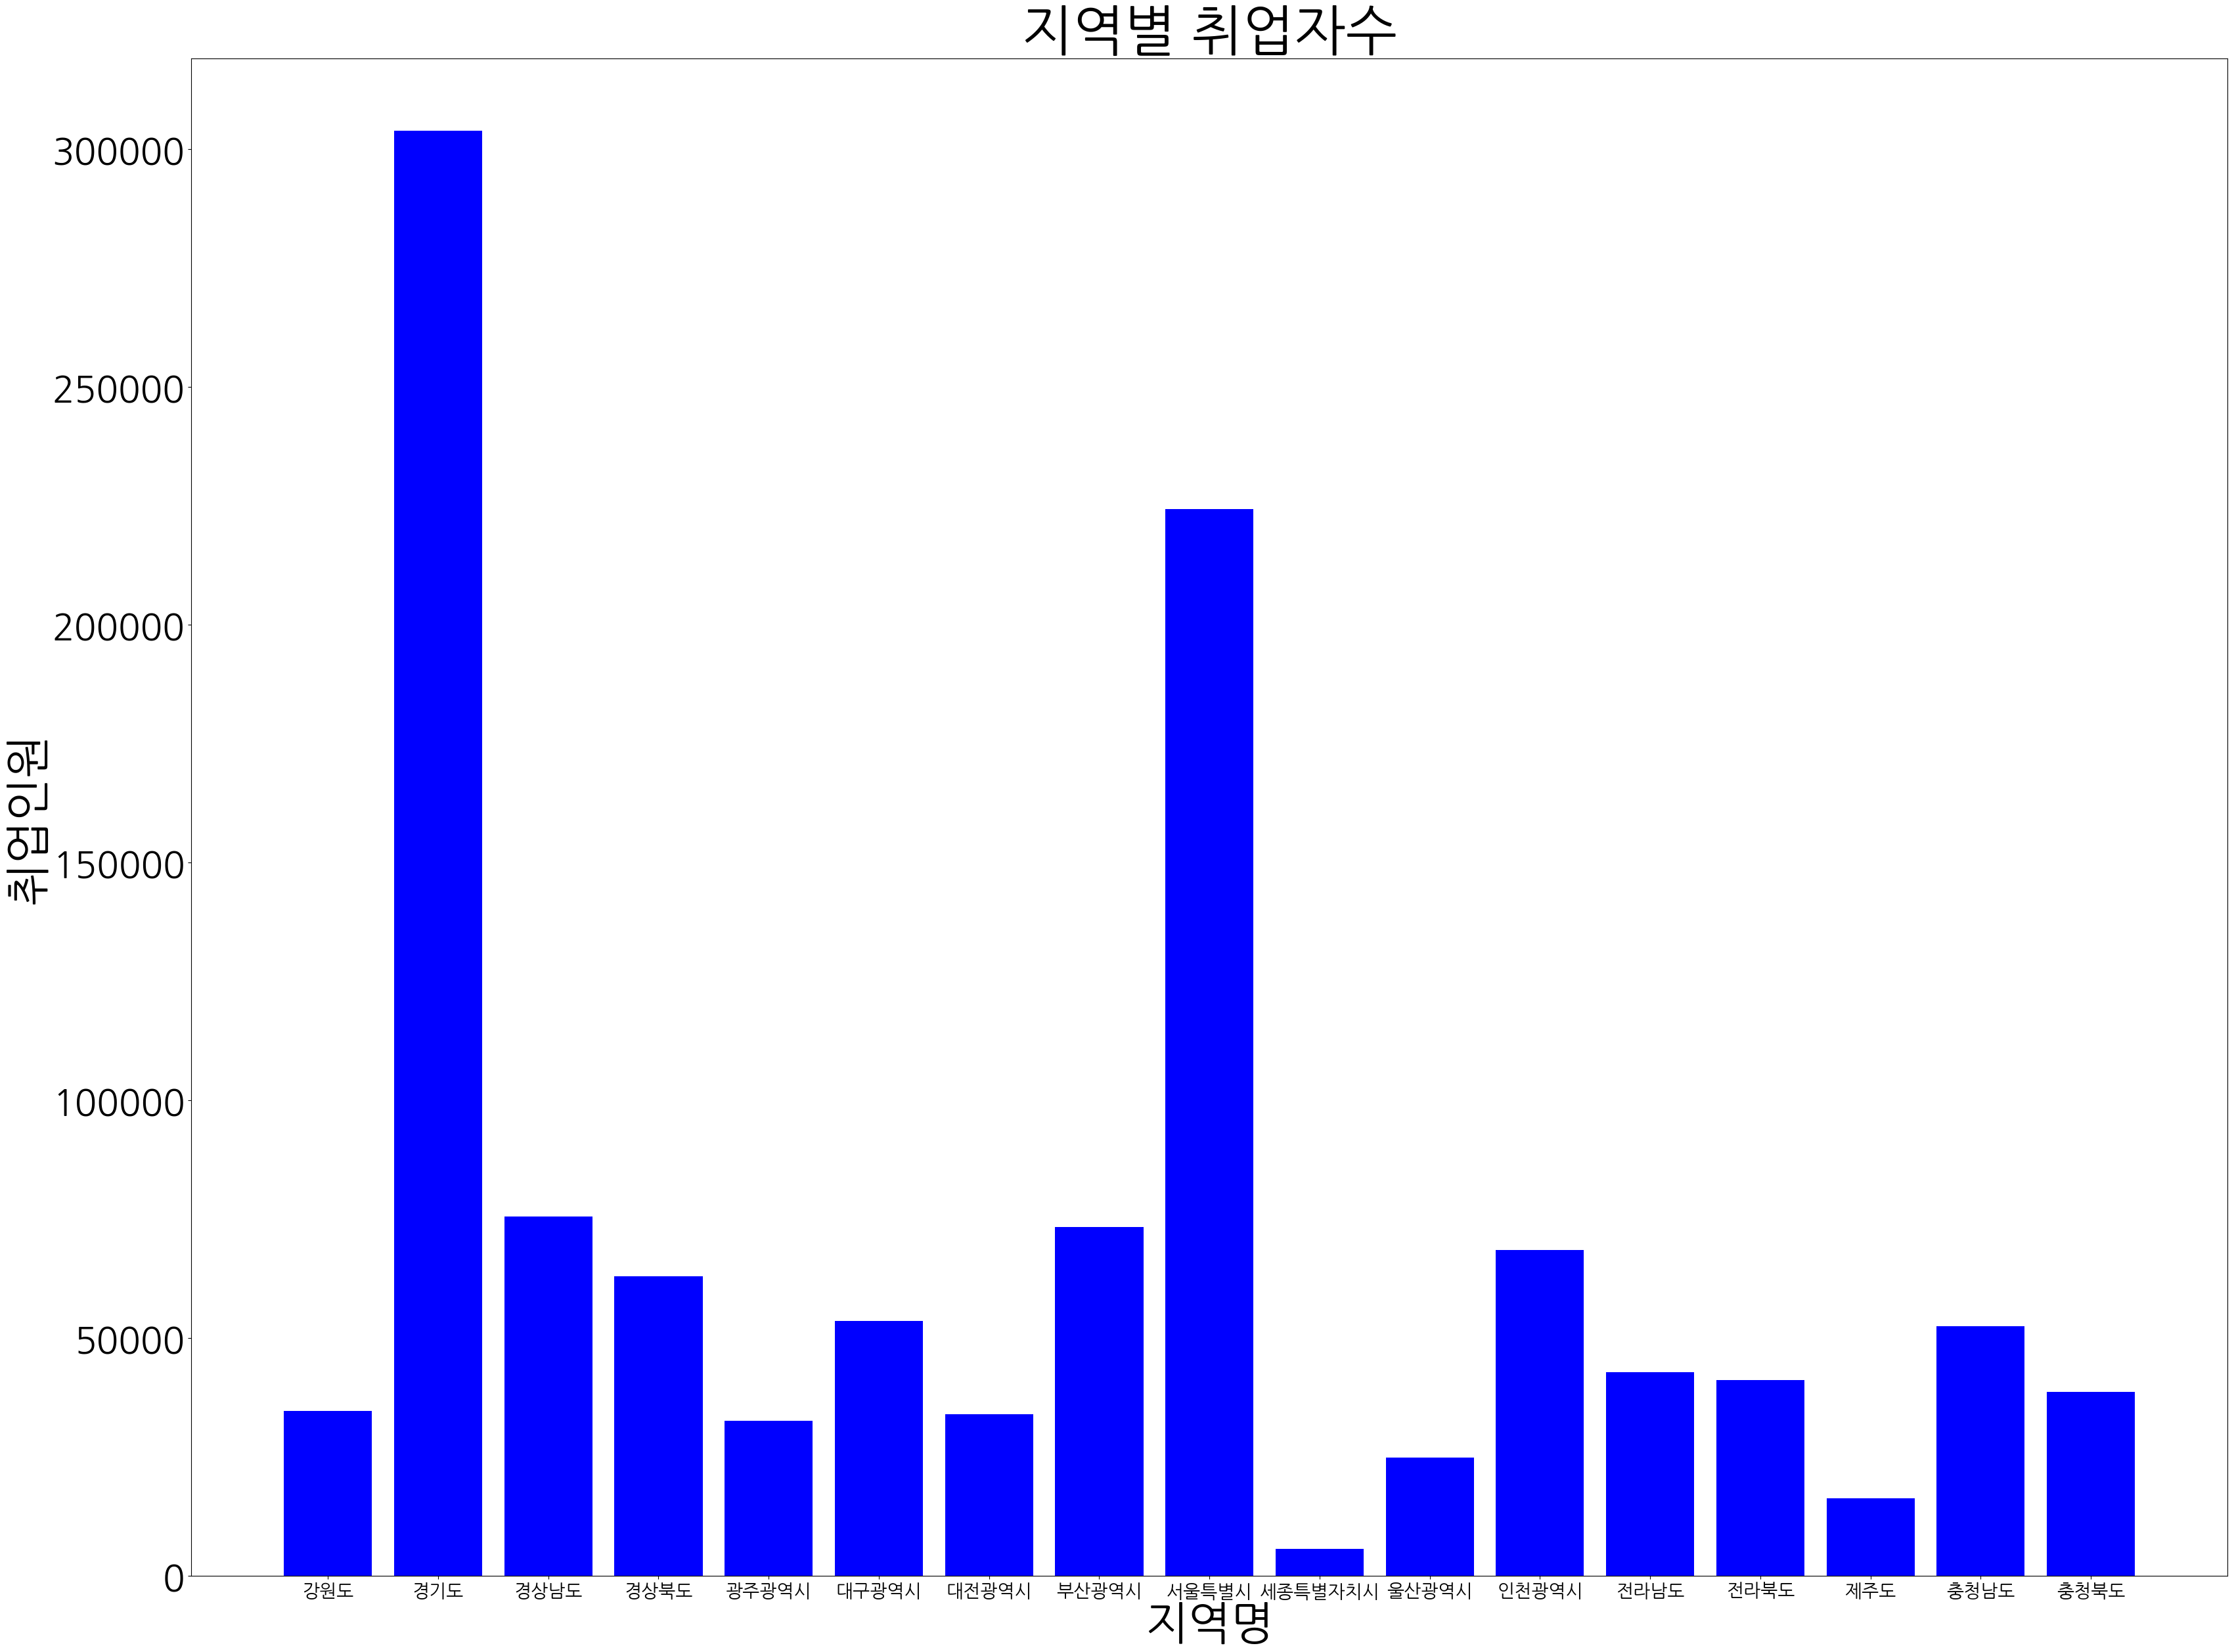

In [12]:
plt.figure(figsize=(40,30))
plt.bar(x = region_data['region'], height = region_data['total'],color='blue')

plt.xlabel('지역명', fontsize=50)
plt.ylabel('취업인원', fontsize=50)
plt.xticks(fontsize=20)  # x축 눈금 글씨 크기
plt.yticks(fontsize=40)  # y축 눈금 글씨 크기
plt.title('지역별 취업자수', fontsize=60)
plt.show()


2014년부터 2024년 분기별 행정구역(시도)/성/연령별 취업자 데이터 분석지표이다.<br>
분기별 분석결과 연도별로 1분기 취업자수가 가장 낮은 수치를 보이며 3분기에 가장 많은 취업자수를 보이고 있다.<br>
예외적으로 코로나 시기를 제외하면 취업자수는 계속해서 증가하는 추세이다.<br>
여성에 비해 남성이 약 5000명 정도 취업자수가 많은 편이며, 지역별 취업자수 인원 지표를 보았을 때 경기도가 가장 많은 취업자수를 차지하며 그 다음으로 서울특별시가 차지한다. 그 외의 지역은 유의미한 차이를 보이진 않으며 세종특별자치시가 약 5000명으로 매우 적은 수치를 보이고 있다.
